### Camera Calibration - Checkboard pattern recognition

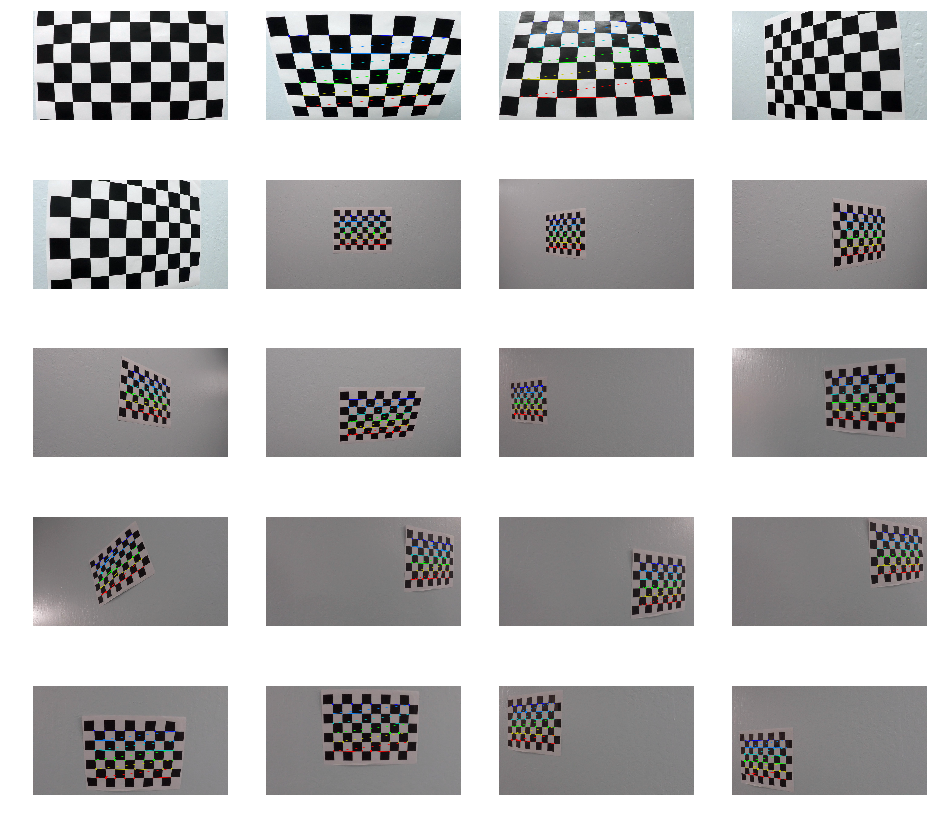

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# %matplotlib qt5

nx, ny = 9, 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane.

# List the calibration images
images = os.listdir("camera_cal/")

# Make a subplot
color_map = "gray"
col_num = 4
row_num = int(len(images)/col_num)
f, axarr = plt.subplots(row_num, col_num, figsize = (col_num*4, row_num*3))

# Step through the list and search for chessboard corners
for i in range(len(images)):
    fname = 'camera_cal/calibration' + str(i+1) + '.jpg'
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

        write_name = './output_images/corners_found'+str(i+1)+'.jpg'
        cv2.imwrite(write_name, img)

    # Either show the original or modified image 
    axarr[int(i/col_num), i % col_num].imshow(img,color_map)
    axarr[int(i/col_num), i % col_num].axis('off')

### Distortion correction visualisation and Save Camera Calibration to Pickle file

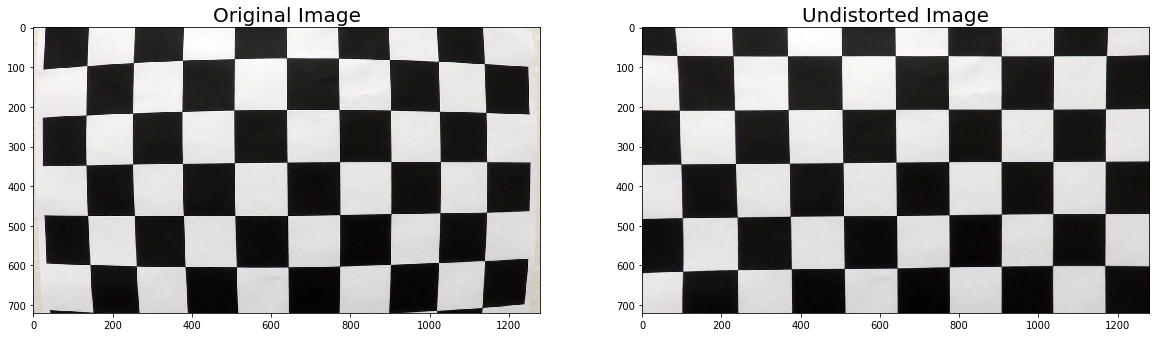

In [2]:
import pickle

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open("wide_dist_pickle.p", "wb"))

# Visualize undistortion
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)

plt.savefig("./output_images/test_undist.png")